# Cardio Good Fitness Case Study - Descriptive Statistics
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file.

### The team identifies the following customer variables to study: 
  - product purchased, TM195, TM498, or TM798; 
  - gender; 
  - age, in years; 
  - education, in years; 
  - relationship status, single or partnered; 
  - annual household income ; 
  - average number of times the customer plans to use the treadmill each week; 
  - average number of miles the customer expects to walk/run each week; 
  - and self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

### Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line.

In [1]:
# Load the necessary packages

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(color_codes=True)

In [2]:
# Load the Cardio Dataset

mydata = pd.read_csv('CardioGoodFitness.csv')

In [3]:
mydata.shape

(180, 9)

In [4]:
mydata.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
mydata.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00


In [6]:
mydata.describe(include="all").round(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.00,180,180.00,180,180.00,180.00,180.00,180.00
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.79,NaN,15.57,NaN,3.46,3.31,53719.58,103.19
std,NaN,6.94,NaN,1.62,NaN,1.08,0.96,16506.68,51.86
min,NaN,18.00,NaN,12.00,NaN,2.00,1.00,29562.00,21.00
25%,NaN,24.00,NaN,14.00,NaN,3.00,3.00,44058.75,66.00
50%,NaN,26.00,NaN,16.00,NaN,3.00,3.00,50596.50,94.00
75%,NaN,33.00,NaN,16.00,NaN,4.00,4.00,58668.00,114.75


In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A3C0D88>,
      dtype=object)

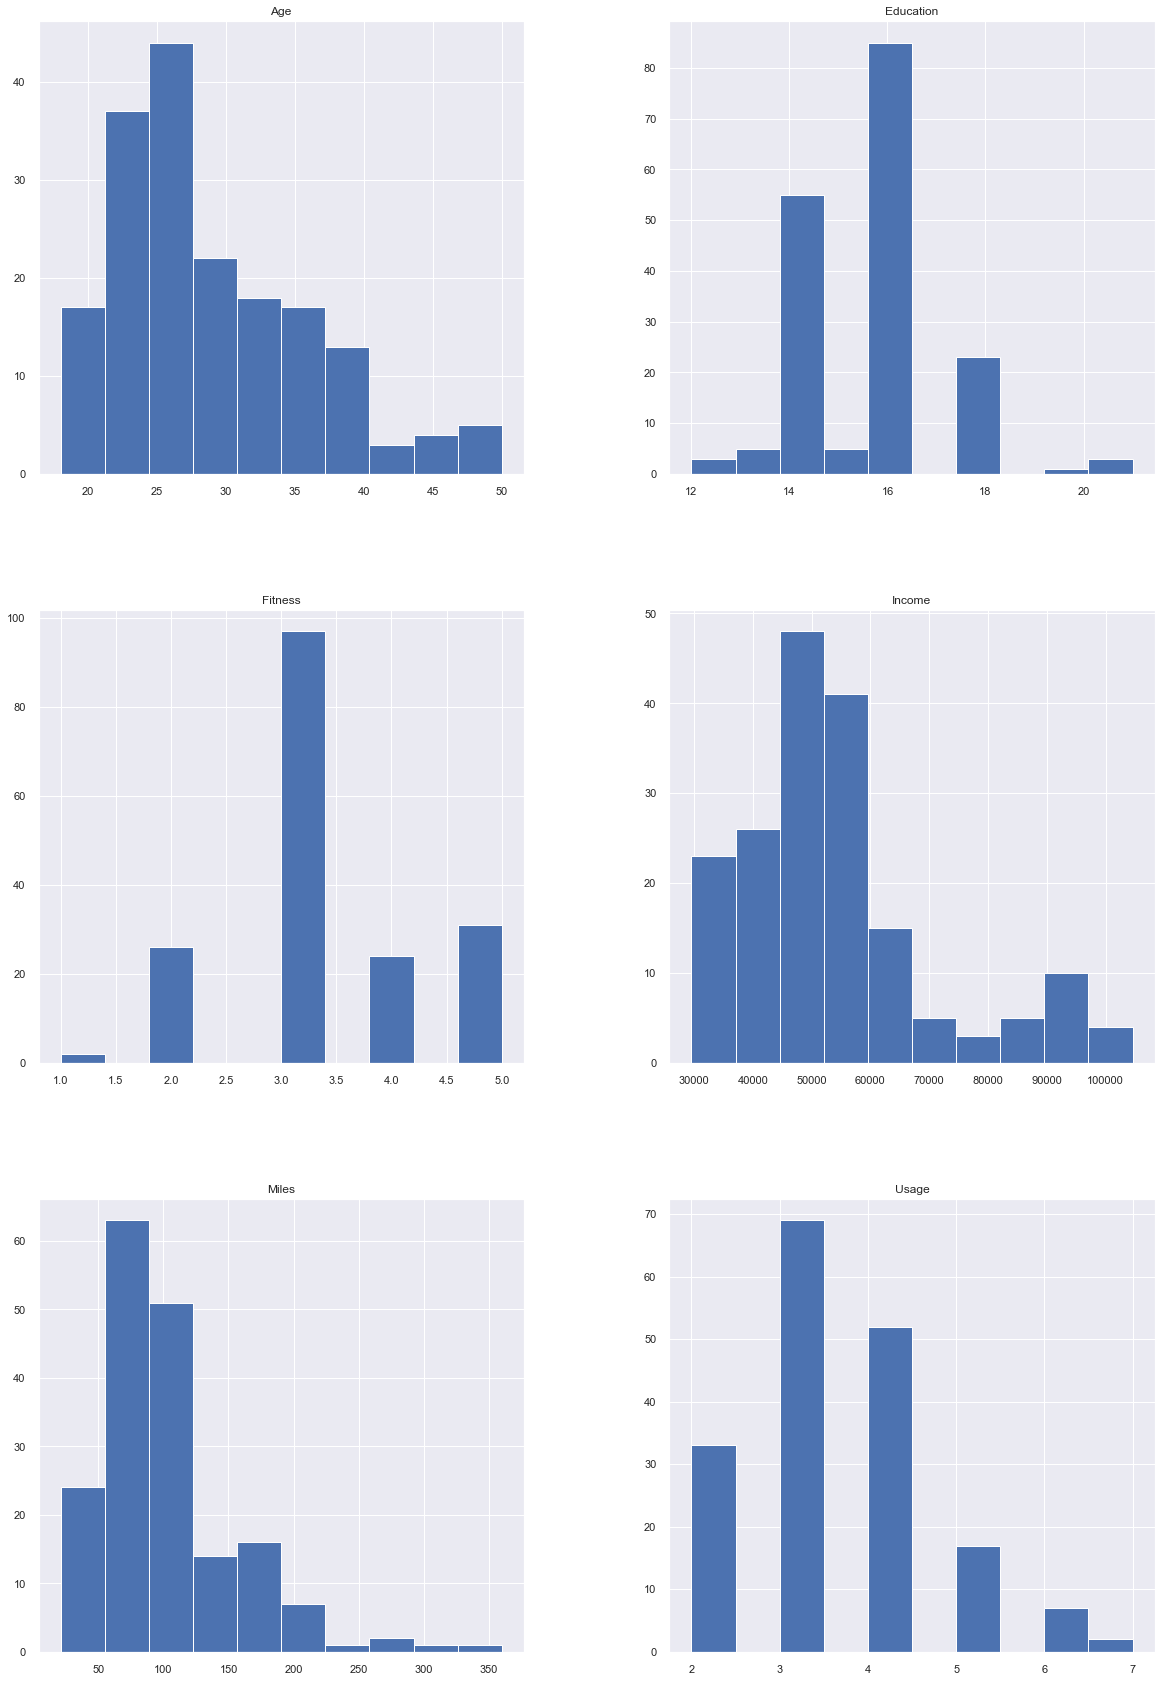

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

mydata.hist(figsize=(20,30))

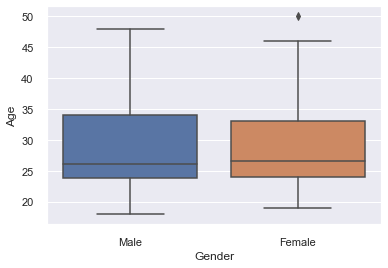

In [9]:
import seaborn as sns

sns.boxplot(x="Gender", y="Age", data=mydata)

In [10]:
pd.crosstab(mydata['Product'],mydata['Gender'] )

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [11]:
pd.crosstab(mydata['Product'],mydata['MaritalStatus'] )

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


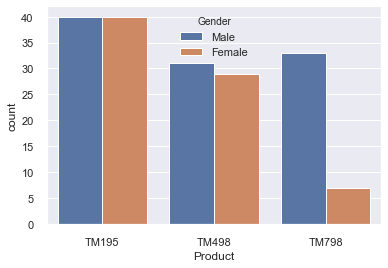

In [12]:
sns.countplot(x="Product", hue="Gender", data=mydata)

In [13]:
pd.pivot_table(mydata, index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'], aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [14]:
pd.pivot_table(mydata,'Income', index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'])

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

In [15]:
pd.pivot_table(mydata,'Miles', index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'])

MaritalStatus    Partnered      Single
Product Gender                        
TM195   Female   74.925926   78.846154
        Male     80.190476   99.526316
TM498   Female   94.000000   80.214286
        Male     87.238095   91.100000
TM798   Female  215.000000  133.333333
        Male    176.315789  147.571429

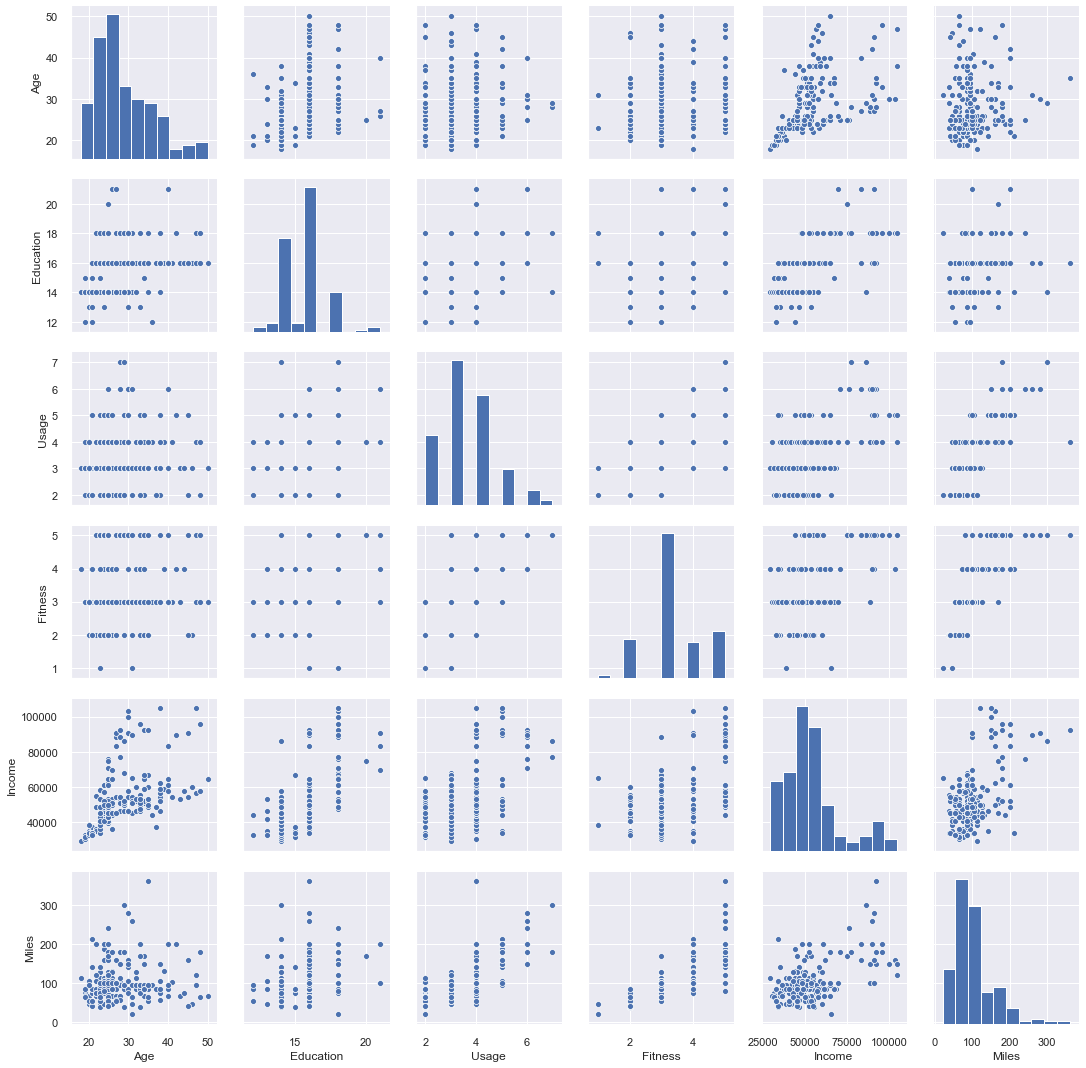

In [16]:
sns.pairplot(mydata)

In [17]:
mydata['Age'].std()

6.943498135399795

In [18]:
mydata['Age'].mean()

28.788888888888888

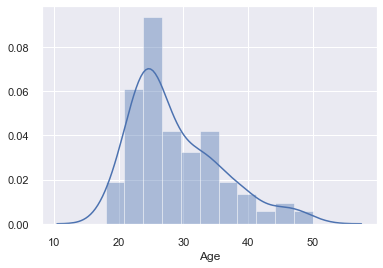

In [19]:
sns.distplot(mydata['Age'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D84DB88>,
      dtype=object)

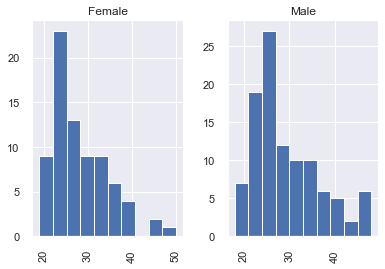

In [20]:
mydata.hist(by='Gender',column = 'Age')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D85F348>,
      dtype=object)

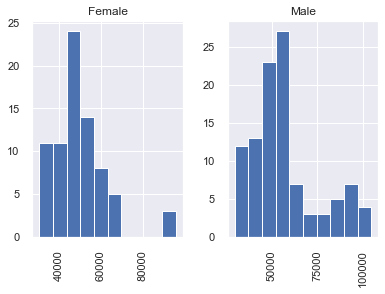

In [21]:
mydata.hist(by='Gender',column = 'Income')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E0B9E48>,
      dtype=object)

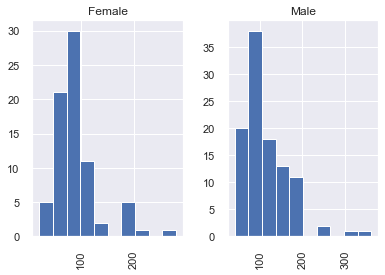

In [22]:
mydata.hist(by='Gender', column = 'Miles')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E397108>,
      dtype=object)

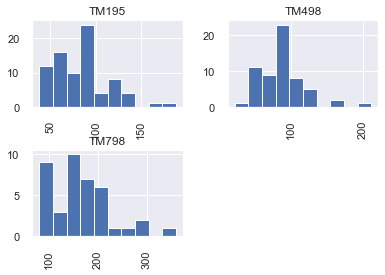

In [23]:
# mydata.hist(by='Product',column = 'Miles', figsize=(20,30))
mydata.hist(by='Product',column = 'Miles')

In [24]:
corr = mydata.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


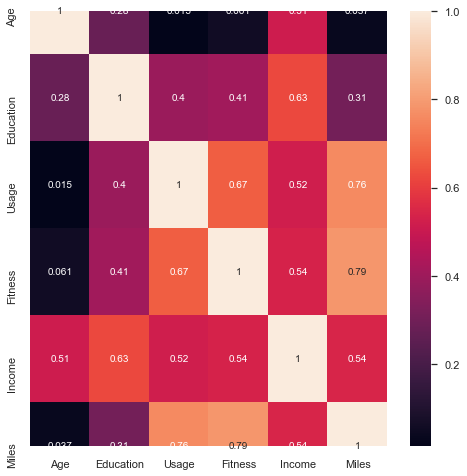

In [25]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True)

In [26]:
# Simple Linear Regression


#Load function from sklearn
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

y = mydata['Miles']
x = mydata[['Usage','Fitness']]

# Train the model using the training sets
regr.fit(x,y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
regr.coef_

array([20.21486334, 27.20649954])

In [28]:
regr.intercept_

-56.74288178464856

In [29]:
# MilesPredicted = -56.74 + 20.21*Usage + 27.20*Fitness